In [23]:
import pandas as pd 
import numpy as np 
import time
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('./4900A1/parkinsons.csv')
df2 = pd.read_csv('./4900A1/sonar.csv')

In [8]:
df1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


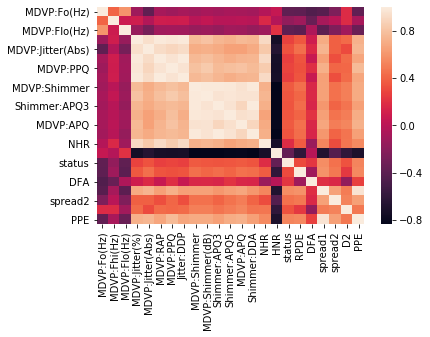

In [11]:
import seaborn as sns 
sns.heatmap(df1.corr())


In [14]:
y = df1.status
x = df1.drop(['status'], axis=1)



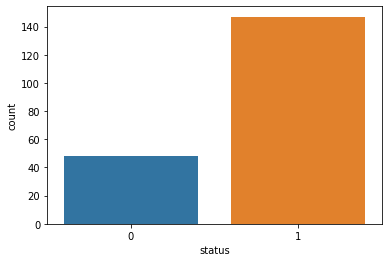

In [15]:
ax = sns.countplot(y, label='Count')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

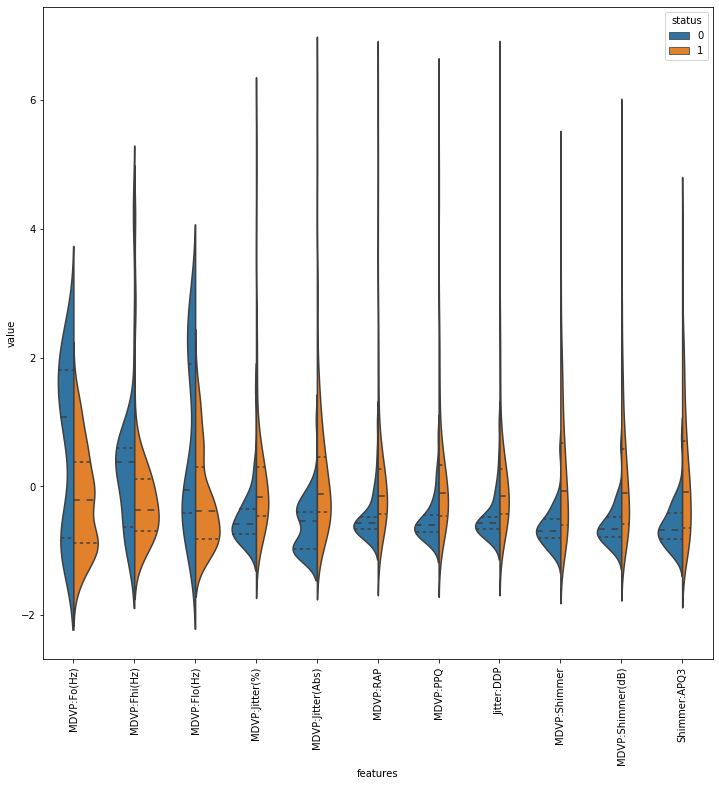

In [28]:
data_target = y 
data = x.drop(['name'], axis=1)

data_n_2 = (data - data.mean()) / (data.std())  
data = pd.concat([y, data_n_2.iloc[:,0:11]], axis=1)
data = pd.melt(data, id_vars='status', var_name='features', value_name='value')
plt.figure(figsize=(12,12))
sns.violinplot(x='features', y = 'value', hue='status', data=data, split=True, inner='quart')
plt.xticks(rotation=90)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

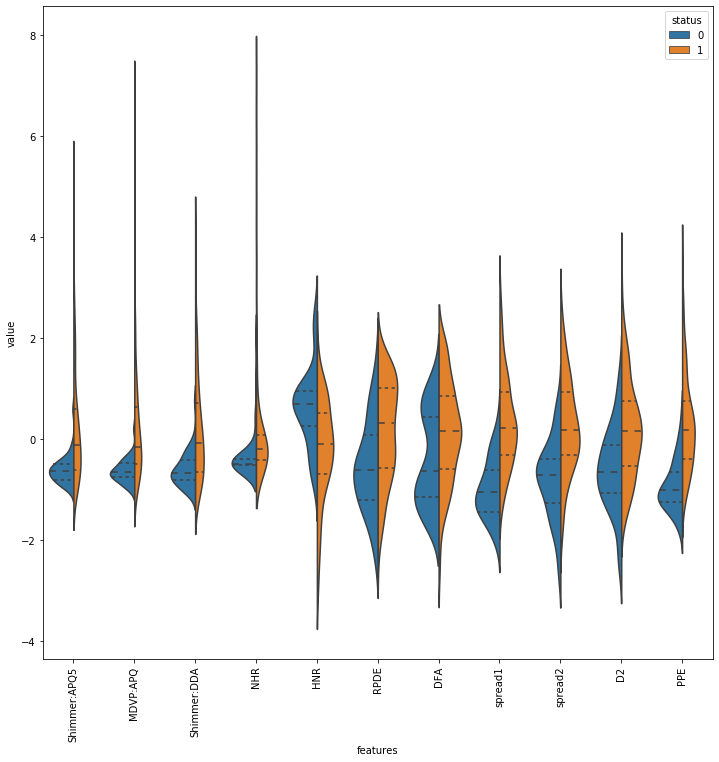

In [29]:
data_target = y 
data = x.drop(['name'], axis=1)

data_n_2 = (data - data.mean()) / (data.std())  
data = pd.concat([y, data_n_2.iloc[:,11:]], axis=1)
data = pd.melt(data, id_vars='status', var_name='features', value_name='value')
plt.figure(figsize=(12,12))
sns.violinplot(x='features', y = 'value', hue='status', data=data, split=True, inner='quart')
plt.xticks(rotation=90)


0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_5
            ...      
190    phon_R01_S50_2
191    phon_R01_S50_3
192    phon_R01_S50_4
193    phon_R01_S50_5
194    phon_R01_S50_6
Name: name, Length: 195, dtype: object

In [30]:
df2.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [34]:
df2

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


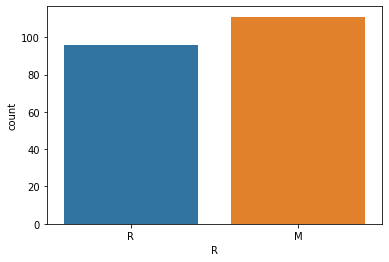

In [35]:
sns.countplot(df2.R, label='Count')

In [36]:
df2.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

In [37]:
x2 = df2.drop(['R'], axis=1)
y2 = df2.R


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

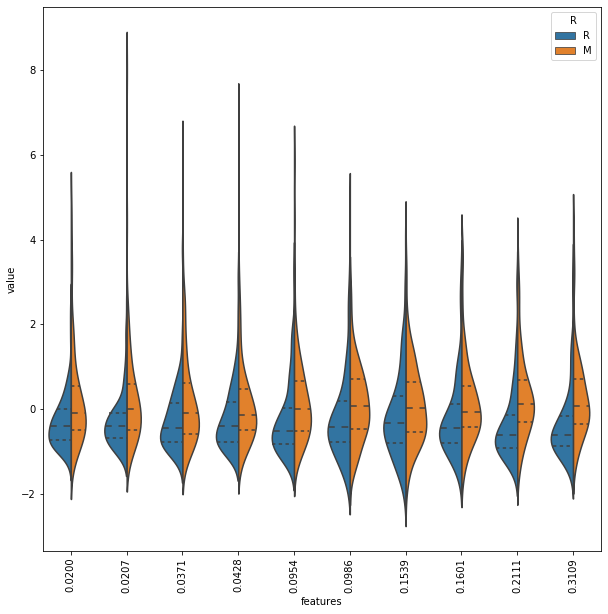

In [40]:
data2 = x2 

data2_n_2 = (data2 - data2.mean())/(data2.std())

data2 = pd.concat([y2, data2_n_2.iloc[:,0:10]], axis=1)
data2 = pd.melt(data2, id_vars='R', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='R', data=data2, split=True, inner='quart')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

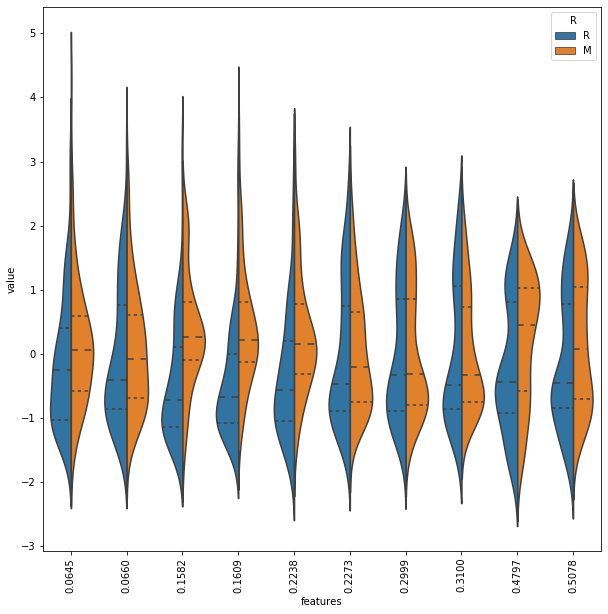

In [41]:
data2 = pd.concat([y2, data2_n_2.iloc[:,10:20]], axis=1)
data2 = pd.melt(data2, id_vars='R', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='R', data=data2, split=True, inner='quart')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

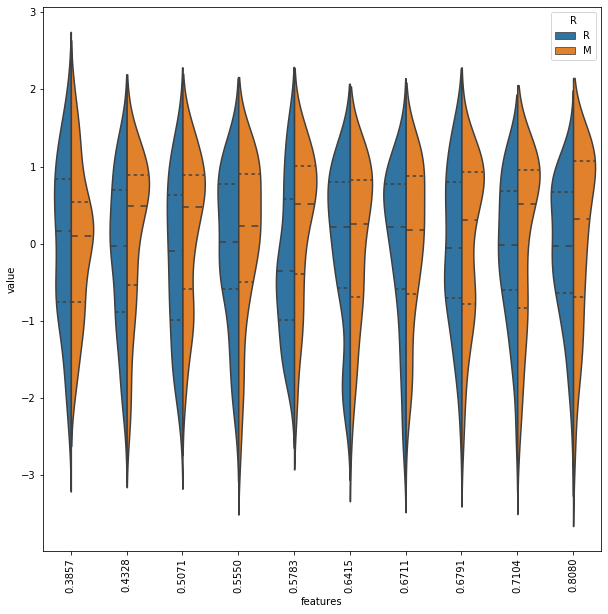

In [42]:
data2 = pd.concat([y2, data2_n_2.iloc[:,20:30]], axis=1)
data2 = pd.melt(data2, id_vars='R', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='R', data=data2, split=True, inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

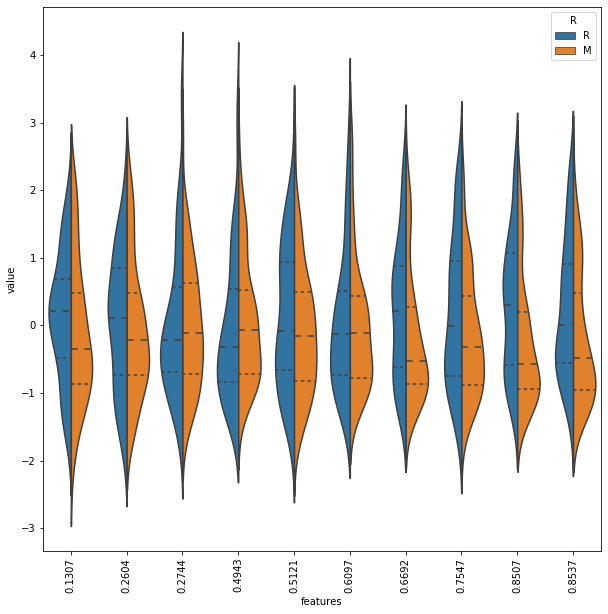

In [43]:
data2 = pd.concat([y2, data2_n_2.iloc[:,30:40]], axis=1)
data2 = pd.melt(data2, id_vars='R', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='R', data=data2, split=True, inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

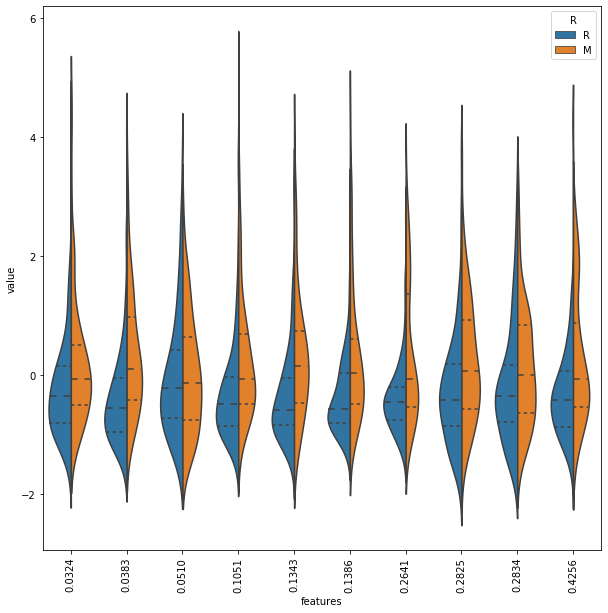

In [44]:
data2 = pd.concat([y2, data2_n_2.iloc[:,40:50]], axis=1)
data2 = pd.melt(data2, id_vars='R', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='R', data=data2, split=True, inner='quart')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

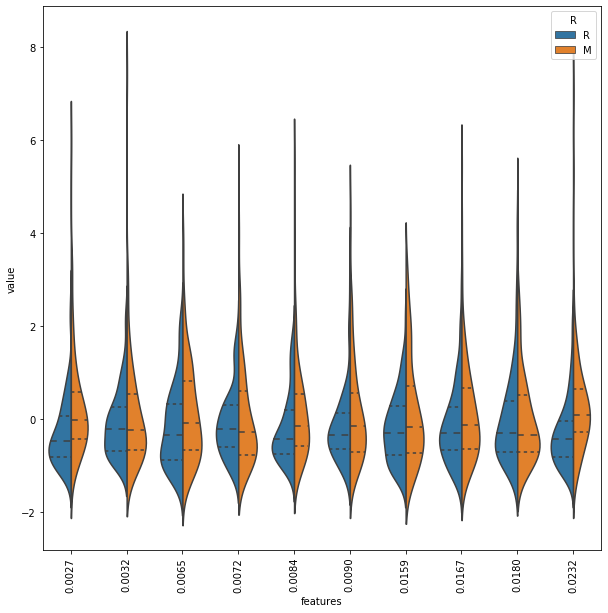

In [45]:
data2 = pd.concat([y2, data2_n_2.iloc[:,50:60]], axis=1)
data2 = pd.melt(data2, id_vars='R', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y = 'value', hue='R', data=data2, split=True, inner='quart')
plt.xticks(rotation=90)

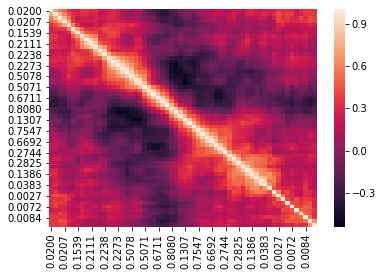

In [46]:
sns.heatmap(df2.corr())

phon_R01_S34_6    1
phon_R01_S25_4    1
phon_R01_S01_5    1
phon_R01_S44_2    1
phon_R01_S08_5    1
                 ..
phon_R01_S24_2    1
phon_R01_S06_4    1
phon_R01_S42_3    1
phon_R01_S19_1    1
phon_R01_S05_2    1
Name: name, Length: 195, dtype: int64